# Week 6 Exercises

## Exercise 1: Neural Network Design
In this exercise your task is to neural networks by hand that compute simple functions.
For the nonlinear transform you can mix them any way you like but you can only use, identity, sign, relu and sigmoid transforms in the neurons.
You can make the networks as wide and deep as you would like but small networks are sufficient.
* Make a network that computes $c \cdot x$ for any constant c
* Make a network that computes xor of inputs $x_1$ and $x_2$. 
* Make a network that computes max($x_1$,$x_2$)
* Make a network that computes $x^2$ - for x in range {2,3,4,5} i.e. x is an integer


- **Hint 1: It is usually easier to find an easy mathematical expression that solves the problem and then to make a network that implements that**
- **Hint 2: The only nonlinear transfrom the teacher uses is relu (and identity)**.

## SOLUTION MATH HERE
A single neuron. Weights c. Nonlinear-transform is identity.

In first layer: One neuron with weights (1,1) and bias -1, taking ReLU. Another neuron with weights (-1,-1) bias +1, taking ReLU. Output layer one neuron with weight (-1,-1) and bias 1, identity.

In first layer: One neuron with weights (1,-1), taking ReLU. Another neuron with weights (-1,1) taking ReLU. And a neuron computing the sum of the two inputs using weights (1,1), identity. Output layer has weights (1/2,1/2,1/2) and identity. Observe: Sum of first two neurons in first layer is max(x_1,x_2)-min(x_1,x_2). Adding x_1+x_2 cancels out the smallest and leaves twice the max. Dividing it all by 2 gives the desired result.

Simpler result by Rasmus and William: two neurons. The first has weights (=1,-1), taking ReLU. The second one has weights (1,0,1), where (1) is from output of the first neuron, and the other (1) is from the variable with weight -1 in the first neuron. Observe that if x_1>x_2, we have x_1 = x_1-x_2 + x_2 = out(first neuron) + input(second neuron). Otherwise x_2 is the answer, with the output of the first neuron being 0.


We create a small network testing whether x = y. This is done by having two neurons, one having weight -1 and bias +y and another having weight 1 and bias -y. Both have ReLU. If x=y then both are 0. Otherwise, one is 0 and one is >= 1. Now create a new neuron taking the two previous as inputs with weight -1000 on both and bias y^2, taking ReLU. This becomes y^2 iff x=y, and otherwise it becomes 0. Do this for every y in 2,3,4,5 and create a neuron with weight 1,1,1,1 summing these and using identity.
## END SOLUTION

## Ex 2: Neural Net Forward Pass - Vectorized
Implement the score (least squares error), and predict function for a a neural net class for regression.
The neural net has one hidden layer with  $\textrm{relu}(x) = \max(0, x)$ nonlinearity and one output neuron.

For the prediction method you must write an algorithm that takes as input a batch of data and computes the output of the neural net on each input point given in the batch.

The data batch is given as an $n \times d$ matrix $X$, where each row is a data point.


A neural net as considered here requires two sets of weights and biases
* The weights that map the input data to the input to hidden units. Call that W_1. The bias weights for this we name $b_1$.

* The weights that map the output of the hidden units to the output. Call that W_2. The bias weights for this we name $b_2$.

We organize the weighs in matrices $(W_1, W_2)$ and vectors $(b_1,b_2)$ as follows:
* The $i'th$ column of $W_1$ are the weights we multiply with the input data to get the input hidden node $i$. The shape of the $W_1$ matrix is $d \times h$
* The bias $b_1$ is a vector of size h, the i'th entry the bias to hidden neuron $i$.
* The $i'th$ column of $W_2$ are the weights we multiply with the hidden layer activations to get the input to the i'th output node. $W_2$ is a $h \times \textrm{output_size}$ matrix ($h \times 1$ matrix in our case)
* The bias $b_2$ is a vector of size output_size 

**Task:** In the cell below (partially) complete the neural net class
- Implement the predict function of the neural net
- Implement the score function (least squares $\frac{1}{n} \sum_i (\textrm{nn}(x_i) - y_i)^2$

Tests:
- We have a simple test case with random weights. The actual error here is random since we just set random weights.
- The second test case uses the weight of a pretreined network for house pricing. Here you should get a score around 0.32 (remove comment to run it)

In [4]:
%matplotlib inline
import numpy as np

class NN():
    
    def __init__(self, input_dim, hidden_size, output_size=1):
        self.W1 = np.random.rand(input_dim, hidden_size)
        self.b1 = np.random.rand(1, hidden_size)
        self.W2 = np.random.rand(hidden_size, output_size)
        self.b2 = np.random.rand(1, output_size)
        print('Neural net initialized with random values')
        
    def predict(self, X):    
        """ Evaluate the network on given data batch 
        
        np.maximum may come in handy
        
        Args:
        X: np.array shape (n, d)  Each row is a data point
        
        Output:
        pred: np.array shape (n, 1) output of network on each input point
        """
        # compute the following values
        pred = None # the output of neural net n x 1
    
        ### YOUR CODE HERE
        hiddenIn = X @ self.W1 + (np.ones((X.shape[0],1)) @ self.b1) #n x h
        nonLinear = np.maximum(hiddenIn,0) #n x h
        output = nonLinear @ self.W2 + (np.ones((X.shape[0],1)) @ self.b2) #n x o
        ### END CODE
        return output
    
    
    def score(self, X, y):
        """ Compute least squares loss (1/n sum (nn(x_i) - y_i)^2)
        
          X: np.array shape (n, d) - Data
          y: np.array shape (n, 1) - Targets

        """
        score = None
        ### YOUR CODE HERE
        pred = self.predict(X)
        score = np.mean((pred-y)**2)
        ### END CODE
        return score
        
# random data test
def simple_test():
    input_dim = 3
    hidden_size = 8
    X = np.random.rand(10, input_dim)
    y = np.random.rand(10, 1)
    my_net = NN(input_dim=input_dim, hidden_size=hidden_size)

    nn_out = my_net.predict(X)
    print('shape of nn_out', nn_out.shape) # should be n x 1
    print('least squares error: ', my_net.score(X, y))
    
# actual data test
def housing_test():
    from sklearn.preprocessing import StandardScaler
    from  sklearn.datasets import fetch_california_housing
    rdata = fetch_california_housing()
    s = StandardScaler()
    Xr = rdata.data
    yr = rdata.target   
    print('data size:', len(yr), 'num features:', Xr.shape[1])
    s.fit(Xr)
    X_scaled = s.transform(Xr)
    house_net = NN(input_dim=Xr.shape[1], hidden_size=8)
    weights = np.load('good_weights.npz')
    house_net.W1 = weights['W1']
    house_net.W2 = weights['W2']
    house_net.b1 = weights['b1'].reshape(1, -1)
    house_net.b2 = weights['b2'].reshape(1, -1)
    print('hidden layer size:', house_net.W1.shape[1])
    lsq = house_net.score(X_scaled, yr.reshape(-1, 1))
    pred = house_net.predict(X_scaled)
    print('mean house price least squares error:', lsq)
    print('5 house prediction:\nestimated price , true price')
    print(np.c_[house_net.predict(X_scaled[0:5, :]), yr[0:5]])

simple_test()
housing_test()

Neural net initialized with random values
shape of nn_out (10, 1)
least squares error:  13.912455240377707
data size: 20640 num features: 8
Neural net initialized with random values
hidden layer size: 7
mean house price least squares error: 0.32253261478095707
5 house prediction:
estimated price , true price
[[3.87439488 4.526     ]
 [3.98254363 3.585     ]
 [3.81248215 3.521     ]
 [3.1932362  3.413     ]
 [2.89667929 3.422     ]]


## Ex: 3 Install and test Pytorch
Later in the course we will be using the deep learning frame work pytorch. So install it. Install torchviz too to help plot computation graphs.
(package name is torch i.e. pip3 install torch),.

In this exercise your task is to automatic differentation to evaluate derivatives of the sigmoid funcion. 
Let us use automatic differentation for another gradient descent algorithm.

Lets do a similar exercise to last time just with some data and Linear Regression Gradient Descent.
First we need to understand that to represent data we must use torch tensors. Tensors are very much like numpy arrays just with some extra functionality.
The thing we will consider is the backward function that computes gradients of whatever computation you have made using torch tensors.

To see how this works, lets see an example.
Lets evaluate the gradient of the sigmoid function without actually knowing the formula. All you need to know is how to compute the function using standard functions i.e. $s(z) = 1/(1+e^{-z})$.



In [2]:
import torch
z = torch.zeros(1, requires_grad=True)
sz = 1.0 / (1 + torch.exp(-z))
sz.backward() # compute gradient of sz relative to z in this case
print('Gradient of f(z)=1/(1 + e^{-z}) at z = 0', z.grad)


Gradient of f(z)=1/(1 + e^{-z}) at z = 0 tensor([0.2500])


## Ex 3 Continued: Gradient Descent with pytorch
In deep learning frameworks all we usually need to do is to show how to compute the cost in a given point and the system then automatically computes the gradient in that data point for you. We will se how later in this course, in this exercise we will try and see if we can use this functionality to do gradient descent.
The example will be similar to last weeks gradient descent except now we actually make a data set to run gradient descent on for Linear Regression.


**Setup:**
We create a data set $D$ that will consist of $n=100$ data points in 2D $(x_1,x_2)$ i.e. two features $x_1, x_2$. 
The data feature vectors of $x_1$ and $x_2$ are made orthogonal and $x_1$ has unit norm while $x_2$ has norm $a$.

We generate a target vector 
$$
y = x_1+x_2
$$ 
which is also a vector of length $n$ i.e. the data we are trying to fit comes from *(a very simple)* linear model.

Remember linear regression the in sample error 
$$
\textrm{E}_\textrm{in}(w) = \frac{1}{n} \sum_{i=1}^n (w^\intercal x_i - y_i)^2 = \frac{1}{n} \|Xw -y\|^2
$$


We have written the code to generate data and the surrounding Gradient Descent for loop, all you need is to write the code for computing the cost (ein).
You can only use commands from torch here (no numpy), but you can use standard operators like $+,-,*,/,**$ on torch tensors that work like their numpy equivalent and torch.sum may be very handy
**Complete the gradient descent code below by computing cost using standard operations and torch commands only**

The gradient descent will start the search at $w=(42, 2)$ for some reason. We have also sat an almost arbitrary learning rate. You can change both if you like.


To see how this linear regression exercise relates to the gradient descent exercie from last week try increasing the value of $a$. 

**For the $a$ specified, the lecturer gets an epoch 41 Cost of approximately 0.25 and a w of approximately [5.75, 0.25]**

In [1]:
import numpy as np 
import torch # the torch tensor library

## CREATE SOME DATA
n = 100
x1 = np.random.rand(n)
x2 = np.random.rand(n)
## Grahm schmidt process - ignore
x1 = x1/np.linalg.norm(x1)
x2 = x2/np.linalg.norm(x2)
x2 = x2 - np.dot(x1, x2) * x1 #
x2 = x2/np.linalg.norm(x2)

## CREATE THE DATA MATRIX
a = 4.0
D = np.c_[x1, a*x2]
# CREATE TARGET FUNCTION VECTOR
y = x1 + x2

# MAKE TORCH VARIABLES TO USE
X = torch.from_numpy(D).double()
ty = torch.from_numpy(y).double()
ni = torch.tensor(1./n, dtype=torch.double)

def torch_gd():
    w = torch.tensor([42.0, 2.0], dtype=torch.double)
    lr = torch.tensor(10.0/a, dtype=torch.double)
    epochs = 42
    cost_hist = []
    for i in range(epochs):
        w.requires_grad_() # say i want gradient relative to w in upcoming computation
        cost = None
        ### YOUR CODE HERE - Compute Ein for linear regression as function of w and store in cost 1 - 4 lines
        cost =  ni * torch.sum((X @ w - ty)**2)
        ### END CODE
        cost_hist.append(cost)
        print('epoch {0}: Cost {1}'.format(i, cost))
        cost.backward() # compute gradient cost as function of w
        w = w - lr * w.grad # update w
        w.detach_() # removes w from current computation graph
    print('best w found', w)
torch_gd()

epoch 0: Cost 17.3
epoch 1: Cost 15.190625000000002
epoch 2: Cost 13.692634062500005
epoch 3: Cost 12.356926041406258
epoch 4: Cost 11.152098704369148
epoch 5: Cost 10.064767998773155
epoch 6: Cost 9.083453075615974
epoch 7: Cost 8.197816399012343
epoch 8: Cost 7.398529300039398
epoch 9: Cost 6.6771726932827855
epoch 10: Cost 6.026148355687603
epoch 11: Cost 5.43859889100806
epoch 12: Cost 4.908335499134772
epoch 13: Cost 4.429772787969132
epoch 14: Cost 3.9978699411421412
epoch 15: Cost 3.6080776218807817
epoch 16: Cost 3.2562900537474047
epoch 17: Cost 2.9388017735070338
epoch 18: Cost 2.6522686005900984
epoch 19: Cost 2.393672412032563
epoch 20: Cost 2.1602893518593884
epoch 21: Cost 1.9496611400530979
epoch 22: Cost 1.7595691788979213
epoch 23: Cost 1.588011183955374
epoch 24: Cost 1.4331800935197254
epoch 25: Cost 1.293445034401552
epoch 26: Cost 1.1673341435474007
epoch 27: Cost 1.053519064551529
epoch 28: Cost 0.9508009557577551
epoch 29: Cost 0.8580978625713738
epoch 30: Cost 0

## Exercise 4: Backpropagation on small example, manually

Consider the simple neural net 
$$
\textrm{nn}(x_1,x_2) = w_3 \cdot \textrm{relu}(w_1 \cdot x_1 + w_2 \cdot x_2)
$$
where $\textrm{relu}(x) = \max(x,0)$ and $w_1, w_2, w_3$ are the weights of the network

We only have one input point $x=(x_1,x_2) = (3.0, 1.0)$ with target value $y=9.0$

Consider the least squares error 
$$
e=(y-\textrm{nn}(x))^2
$$

We need to minimize the error over $w_1, w_2, w_3$ and will do that using the gradients of $e$ relative to $w_1, w_2, w_3$.
Initialize $w_1=1,w_2=2, w_3=1$

Draw the computational graph for $e$ and run the forward pass to compute the output of the neural network on $x$ and the least squares error, and then run the backwards pass to compute the partial derivative of the loss relative to $w_1,w_2, w_3$ on the fixed input $x,y$ with the fixed values for $w_1,w_2,w_3$.

Write the python code that performs the forward and backwards pass below and evaluate the cost and the gradient
using notation similar to
http://cs231n.github.io/optimization-2/

Print intermediate steps in both the forward and the backward pass.

In [2]:
print('Do the python forward and backward pass here')
x1 = 3.0
x2 = 1.0 
y = 9.
w1 = 1.0
w2 = 2.0
w3 = 1.0
### YOUR CODE HERE
# Long Forward Pass
z1 = w1 * x1
z2 = w2 * x2
hin = z1 + z2
hout = max(hin, 0)
pred = w3 * hout
diff = pred - y
e = diff**2
print('z1', z1)
print('z2', z2)
print('hin', hin)
print('hout', hout)
print('pred', pred)
print('diff', diff)
print('ls error', e)

# backwards pass
de_diff = 2 * diff
ddiff_pred = 1
de_pred = de_diff * ddiff_pred
dpred_w3 = hout
de_w3 = de_pred * dpred_w3 # dout_w3 = rs
dpred_hout = w3
de_hout = de_pred * dpred_hout
dhout_hin = hin > 0
de_hin = de_hout * dhout_hin
dhin_z1 = 1
dhin_z2 = 1
de_z1 = de_hin * dhin_z1
de_z2 = de_hin * dhin_z2
dz1_w1 = x1
dz2_w2 = x2
print('dz', dz1_w1, dz2_w2)
de_w1 = de_z1 * dz1_w1
de_w2 = de_z2 * dz2_w2
print('d_diff', de_diff)
print('d_pred', de_diff)
print('d_hout', de_diff)
print('d_hin', de_diff)
print('d_w1:', de_w1)
print('d_w2:', de_w2)
print('d_w3:', de_w3)

### END CODE



Do the python forward and backward pass here
z1 3.0
z2 2.0
hin 5.0
hout 5.0
pred 5.0
diff -4.0
ls error 16.0
dz 3.0 1.0
d_diff -8.0
d_pred -8.0
d_hout -8.0
d_hin -8.0
d_w1: -24.0
d_w2: -8.0
d_w3: -40.0


## Ex 5: Automated Backpropagation using pytorch
In this exercise we will check our results from the previous exercise using pytorch.

For this we only need to code the forward pass and let automatic differentation take care of the rest!

**Task:** Write the forward pass in the cell below and use automatic differentation to test your answer from above.

Use x.retain_grad() to keep the gradient of any intermediate computation used in the forward pass to compare with above



forward pass
least squares error tensor([[16.]], grad_fn=<PowBackward0>)
d_diff tensor([[-8.]])
d_pred tensor([[-8.]])
d_hout tensor([[-8.]])
d_hin tensor([[-8.]])
d_w1 tensor([[-24.]])
d_w2 tensor([[-8.]])
d_w3 tensor([[-40.]])
Lets show the computation graph


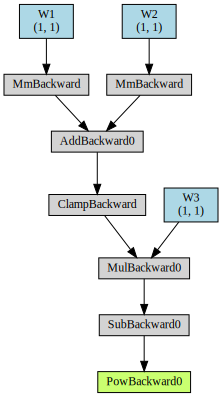

In [3]:
import torch
from torchviz import make_dot # install this package 

x1 = torch.tensor([[3.]])
x2 = torch.tensor([[1.]])
y = torch.tensor([9.])
W1 = torch.tensor([[1.]], requires_grad=True)
W2 = torch.tensor([[2.]], requires_grad=True)
W3 = torch.tensor([[1.]], requires_grad=True)
### YOUR CODE HERE - The clamp function may be usefull
hin = x1 @ W1 + x2 @ W2
hout = hin.clamp(min=0)
pred = hout * W3
diff = pred - y
loss = diff**2
print('forward pass')
print('least squares error', loss)
hin.retain_grad()
hout.retain_grad()
pred.retain_grad()
diff.retain_grad()
loss.backward()
print('d_diff', diff.grad)
print('d_pred', pred.grad)
print('d_hout', hout.grad)
print('d_hin', hin.grad)

### END CODE
# print the graph - change naming appropriately
print('d_w1', W1.grad)
print('d_w2', W2.grad)
print('d_w3', W3.grad)
print('Lets show the computation graph')
make_dot(loss, params={'W1': W1, 'W2': W2, 'W3': W3})

## Ex. 6: Matrix of Derivatives for applying function elementwise to vector 
In this exercise we consider the matrix of derivatives when mapping a vector of size $n$ to a vector of size $n$ by applying a function $f$ to each entry in the input.

Let $f$ be a smooth function from $\mathbb{R} \rightarrow \mathbb{R}$.

Let $F: \mathbb{R}^d \rightarrow \mathbb{R^d}$ defined as $F(v) = \left[f(v_1), \dots, f(v_d)\right]$

- Show that the Matrix of Derivative $\frac{\partial F}{\partial x}= D_f$, the $d \times d$ diagonal matrix where the $i$'th diagonal entry is $f'(v_i)$.
- If $f(x) = 1/(1+e^{-x})$ i.e. the logistic sigmoid function then how does the Diagonal matrix look
- If $f(x) = \max(0, x)$ i.e. relu how does the Diagonal Matrix look
- Consider a neural net backpropagation step and let hout be the output of applying F to the vector hin and assume we have computed the vector $\frac{\partial L}{\partial \textrm{hout}}$ ($1 \times h$)
    and wish to compute  $\frac{\partial L}{\partial \textrm{hin}}$ (also $1\times h)$. Write the python code that achieves this below.
    
## SOLUTION MATH HERE
 The matrix of derivatives is a $d \times d$ matrix
 
 The derivative of $f_i = f(v_i)$ after $v_j$ is zero if $i != j$. So we get a diagonal matrix.
 
 If i==j then we need the derivative of $f(v_i)$ as a function of v_i which is $f'(v_i)$.
 
 For sigmoid we get $D_{i,i} = f(x_i)(1-f(x_i))$ 
 
 For relu we get $D_{i, i} = x_i > 0$ (indicator variables)
## END SOLUTION

**hint:** There may be a more efficient way than actually creating the diagonal matrix and multiplying on the backpropagated derivative but you do not have to optimize.

In [3]:
import numpy as np
h_in = np.array([[-1, 2, 4]])
d_hout = np.array([[1,2,3]])
print('shapes:', h_in.shape, d_hout.shape)
def relu_grad(d_hout, hin):
    d_hin = None
    ### YOUR CODE HERE
    d_hin = d_hout.copy()
    d_hin[hin<0] = 0
    #d_hin = d_hin * (hin<0)
    
    ### END CODE
    return d_hin

def sigmoid_grad(d_hout, hin):
    d_hin = None
    ### YOUR CODE HERE
    def sigmoid(x):
        return 1./(1+np.exp(-x))
    d_hin =  d_hout * (sigmoid(hin)*(1-sigmoid(hin))) # entrywise multiplication
    ### END CODE
    return d_hin

print('d_hin relu:', relu_grad(d_hout, h_in))
# should be [0, 2, 3]
print('d_hin sigmoid:', sigmoid_grad(d_hout, h_in))
# should be ~ [0.196..., 0.209..., 0.052...]


shapes: (1, 3) (1, 3)
d_hin relu: [[0 2 3]]
d_hin sigmoid: [[0.19661193 0.20998717 0.05298812]]


## Ex 7: Neural Nets by automatic differentation in pytorch
Before we introduce our selves to the idiomatic way of writing neural net code in pytorch we will implement a pair of basic basic neural nets and train it using just automatic differentation and the optim module from pytorch that implements different gradient based optimization methods.

**The task is:**

Using pytorch implement Linear Regression with a weight decay.
(named Ridge Regression in litterature ) using Gradient Descent as Learning Algorithm 
and implement a one hidden layer neural net with relu activation for regression (identity output neuron) with with the same cost

Let $w, b$ be the parameters of the function $f$ we are trying to learn, then least squares with weight decay cost for weight decay parameter $c$ is
$$
\frac{1}{n} \sum_{i=1}^n (f(x)-y)^2 + c \sum_{i=1}^d w_i^2
$$
Note we do not penalize the bias weights.

1. Implement Linear Regression with Gradient Descent and test on the Boston data set for house prices (see cell below)
   Linear regression is simply a neural net with no hidden layer and one output neuron. We have implemented the fit methods to show you how to use the optim module.
   That means all you need to do is implement the cost method.
2. Implement  implement a standard one hidden layer neural net for regression. That means identity output activation and least squares error with weight decay. The formula for weight decay is the same, i.e. you need to add the squared weight to the error for all weights in all layers. 
For nonlineariry use relu. See cell two below
   In this exercise you need to complete the following two methods (hint: fit is similar to linear regression fit(
   - cost - compute the least squares cost of the network on data and return the pytorch tensor of that
   - fit - train 100 steps og gradient descent using optim package - find a good learning rate your self

We test your implementation on a standard regression data set for house prices and compare to the sklearn build in Ridge Regression. 
We only consider in sample error, which is of course not what we care about in the real world!.

Your Linear Regression implementation should get close to the sklearn Ridge Regression implementation that we have included

For the Neural Net you should do better (in sample)

In [1]:
import torch
from torch import optim
from sklearn.datasets import load_boston
from sklearn import linear_model

print('*'*5, 'Load and Prepare Data', '*'*5)
dataset = load_boston()
# print('dataset', dataset)
X, y = dataset.data, dataset.target
X = (X - X.mean(axis=0))/(X.std(axis=0))
#print('data stats', X.shape, X.mean(axis=0), X.std(axis=0))
ridge=linear_model.Ridge(alpha=0.1, fit_intercept=True)
ridge.fit(X, y)
# print(ridge.coef_, ridge.intercept_)
print('\n', '*'*5, 'Test Sklearn Ridge Regression for Comparison', '*'*5)
print('Ridge Regression Score:', ((ridge.predict(X)-y)**2).mean())

print('\n', '*'*5, 'Make data to torch tensors', '*'*5)
tX = torch.from_numpy(X).float()
ty = torch.from_numpy(y).float().view(-1, 1)


class LR():
    
    def __init__(self):
        pass
        
    def cost(self, X, y, w, b, c=0):
        """ Compute Regularized Least Squares Loss
        
          X: torch.tensor shape (n, d) - Data
          y: torch.tensor shape (n, 1) - Targets
          w: torch.tensor shape (d, 1) - weights
          b: torch.tensor shape (1, 1) - bias weight
          c: scalar, weight decay parameter 
          
          returns (regularized) cost tensor        
        """
        loss = None
        ### YOUR CODE HERE
        pred = X @ w + b 
        loss = torch.mean((pred-y)**2) 
        reg_loss = torch.sum(w**2)
        ### END CODE
        return loss + c * reg_loss
    
    def fit(self, X, y, c=0):
        """ GD Learning Algorithm for Ridge Regression with pytorch
        
        Args:
         X: torch.tensor shape (n, d)
         y: torch.tensor shape (n, 1)
         c: ridge regression weight decay parameter (lambda)
        """
        w = torch.zeros(X.shape[1], 1, requires_grad=True)
        b = torch.zeros(1, 1, requires_grad=True)
        sgd = optim.SGD(params={w, b}, lr=0.1)
        for i in range(100):
            sgd.zero_grad()
            loss = self.cost(X, y, w, b, c=c)
            if i % 10 == 0:
                print('epoch:', i, 'least squares (regularized loss)', loss.item())
            loss.backward()
            sgd.step()
        self.w = w.clone()
        self.b = b.clone()


    def score(self, X, y):
        """ Compute least squares cost for model 
        
        Args:
         X: torch.tensor shape (n, d)
         y: torch.tensor shape (n, 1)
         
        returns least squares score of model on data X with targets y
        """
        score = self.cost(X, y, self.w, self.b, c=0)
        return score

print('\n', '*'*5, 'Run Torch Linear Regression Gradient Descent', '*'*5)

tlr = LR()
tlr.fit(tX, ty, 0.1)
print('pytorch Linear Regression Regression least squares score:', tlr.score(tX, ty).item())

***** Load and Prepare Data *****

 ***** Test Sklearn Ridge Regression for Comparison *****
Ridge Regression Score: 21.89484192522429

 ***** Make data to torch tensors *****

 ***** Run Torch Linear Regression Gradient Descent *****
epoch: 0 least squares (regularized loss) 592.1469116210938
epoch: 10 least squares (regularized loss) 32.51519012451172
epoch: 20 least squares (regularized loss) 26.201087951660156
epoch: 30 least squares (regularized loss) 25.99349021911621
epoch: 40 least squares (regularized loss) 25.94190216064453
epoch: 50 least squares (regularized loss) 25.922088623046875
epoch: 60 least squares (regularized loss) 25.91387367248535
epoch: 70 least squares (regularized loss) 25.910276412963867
epoch: 80 least squares (regularized loss) 25.90863037109375
epoch: 90 least squares (regularized loss) 25.90785026550293
pytorch Linear Regression Regression least squares score: 22.676130294799805


In [2]:
import torch
from torch import optim
from sklearn.datasets import load_boston
from sklearn import linear_model

dataset = load_boston()
X, y = dataset.data, dataset.target
X = (X - X.mean(axis=0))/(X.std(axis=0))
tX = torch.from_numpy(X).float()
ty = torch.from_numpy(y).float().view(-1, 1)

class NN():
    
    def __init__(self):
        pass

    def cost(self, X, y, W1, b1, W2, b2, c=0):
        """ Compute (Regularized) Least Squares Loss of neural net
        The clamp function may be usefull
        
          X: torch.tensor shape (n, d) - Data
          y: torch.tensor shape (n, 1) - Targets
          W1: torch.tensor shape (d, h) - weights
          b1: torch.tensor shape (1, h) - bias weight
          W2: torch.tensor shape (h, 1) - weights
          b2: torch.tensor shape (1, 1) - bias weight
          c: ridge regression weight decay parameter 
    
        returns (weight decay) cost tensor
        """
   
        loss = None
        ### YOUR CODE HERE
        hin = X @ W1 + b1
        hout = hin.clamp(min=0)
        pred = hout @ W2 + b2
        loss = torch.mean((pred-y)**2) 
        reg_loss = c * torch.sum(W1**2) + c * torch.sum(W2**2)
        loss = loss + reg_loss
        ### END CODE
        return loss
    
    def fit(self, X, y, hidden_size=32, c=0.01):   
        """ GD Learning Algorithm for Ridge Regression with pytorch
        
         Args:
         X: torch.tensor shape (n, d)
         y: torch.tensor shape (n, 1)
         hidden_size: int 
         c: float weight decay parameter (lambda)
        """
        input_dim = X.shape[1]        
        W1 = torch.randn(input_dim, hidden_size, requires_grad=True)
        b1 = torch.randn(1, hidden_size, requires_grad=True)
        W2 = torch.randn(hidden_size, 1, requires_grad=True)
        b2 = torch.randn(1, 1, requires_grad=True)
        ### YOUR CODE HERE
        sgd = optim.SGD(params={W1, W2, b1, b2}, lr=0.01)
        for i in range(100):
            sgd.zero_grad()
            loss = self.cost(X, y, W1, b1, W2, b2, c=c)
            if i % 10 == 0:
                print('epoch:', i, 'nn least squares loss', loss.item())
            loss.backward()
            sgd.step()
        ### END CODE
        self.W1 = W1
        self.W2 = W2
        self.b1 = b1
        self.b2 = b2
        
    def score(self, X, y):
        """ Compute least squares cost for model 
        
        Args:
         X: torch.tensor shape (n, d)
         y: torch.tensor shape (n, 1)
         
        returns least squares score of model on data X with targets y
        """
        score = self.cost(X, y, self.W1, self.b1, self.W2, self.b2, c=0)
        return score


net = NN()
net.fit(tX, ty, hidden_size=16, c=0.01)
print('pytorch Neural Net Regression least squares score:', net.score(tX, ty).item())

epoch: 0 nn least squares loss 642.3568725585938
epoch: 10 nn least squares loss 27.601709365844727
epoch: 20 nn least squares loss 21.81852912902832
epoch: 30 nn least squares loss 19.55316162109375
epoch: 40 nn least squares loss 18.162565231323242
epoch: 50 nn least squares loss 17.190034866333008
epoch: 60 nn least squares loss 16.485641479492188
epoch: 70 nn least squares loss 15.916590690612793
epoch: 80 nn least squares loss 15.467313766479492
epoch: 90 nn least squares loss 15.086695671081543
pytorch Neural Net Regression least squares score: 12.451496124267578
